# Description of the project
Testing hypotheses to increase revenue in an online store - evaluate the results of an A / B test

## Research objectives:
- prioritize hypotheses,
- run an A/B test,
- analyze the results.

## Description of data

File `/datasets/hypothesis.csv`
- `Hypothesis` — short description of a Hypothesis;
- `Reach` — user coverage on a 10-point scale;
- `Impact` — impact on users on a 10-point scale;
- `Confidence` — confidence in the hypothesis on a 10-point scale;
- `Efforts` — resource costs for hypothesis testing on a 10-point scale. The larger the Efforts value, the more expensive the hypothesis test.

File `/datasets/orders.csv`
- `transactionId` — order ID;
- `visitorId` — ID of the user who made the order;
- `date` — the date the order was placed;
- `revenue` — order revenue;
- `group` — the A/B test group the order is in.

File `/datasets/visitors.csv`
- `date` — date of visit;
- `group` — A/B-test group;
- `visitors` — number of users on the specified date in the specified A/B test group

# Exploratory Data Analysis

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import datetime as dt


In [2]:
try:
    hypothesis = pd.read_csv('/Users/nataliamarukh/Documents/DATA Analytics/Sprint 7. Принятие решений в бизнесе. А-В тесты/_ПРОЕКТ 7/hypothesis.csv')
    orders = pd.read_csv('/Users/nataliamarukh/Documents/DATA Analytics/Sprint 7. Принятие решений в бизнесе. А-В тесты/_ПРОЕКТ 7/orders.csv')
    visitors = pd.read_csv('/Users/nataliamarukh/Documents/DATA Analytics/Sprint 7. Принятие решений в бизнесе. А-В тесты/_ПРОЕКТ 7/visitors.csv')
    
except:
    hypothesis = pd.read_csv('/datasets/hypothesis.csv')
    orders = pd.read_csv('/datasets/orders.csv')
    visitors = pd.read_csv('/datasets/visitors.csv')
    

In [3]:
# a function for primary analysis
def primary_analysis(df):
    display(df.head())
    print()
    display(df.info())
    print()
    print('Number of explicit duplicates',df.duplicated().sum())

In [4]:
primary_analysis(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None


Number of explicit duplicates 0


In [5]:
primary_analysis(orders)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None


Number of explicit duplicates 0


In [6]:
primary_analysis(visitors)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None


Number of explicit duplicates 0


In [7]:
#replace data type in date columns
orders['date'] = orders['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)

visitors['date'] = visitors['date'].map(
    lambda x: dt.datetime.strptime(x, '%Y-%m-%d')
)


In [8]:
print(orders['date'].dtype.type)
print(visitors['date'].dtype.type)

<class 'numpy.datetime64'>
<class 'numpy.datetime64'>


In [9]:
#convert column names to lowercase
hypothesis.columns = [x.lower() for x in hypothesis.columns]
hypothesis.columns


Index(['hypothesis', 'reach', 'impact', 'confidence', 'efforts'], dtype='object')

In [10]:
#Delete all users who are in both groups

visA = orders[orders['group'] == 'A']['visitorId']
visB = orders[orders['group'] == 'B']['visitorId']
visBoth = list(set(visA) & set(visB))
orders = orders[np.logical_not(orders['visitorId'].isin(visBoth))]
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [11]:
#Confirm the number of groups and check the number of users in each of them
display(
    visitors.groupby('group',as_index=False).agg(
    {'visitors':'sum'}
))

display(
    orders.groupby('group',as_index=False).agg(
    {'visitorId':'count'}
))

,group,visitors
0,A,18736
1,B,18916


,group,visitorId
0,A,468
1,B,548




* We've matched the data types with the values and made sure there are no obvious duplicates.

* Removed all users who fell into both groups.

* Confirmed the number of groups and checked the number of users in each of them.
    


# Prioritization of hypotheses

- Apply the ICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Apply the RICE framework to prioritize hypotheses. Sort them in descending order of priority.
- Indicate how the prioritization of hypotheses has changed when using RICE instead of ICE.

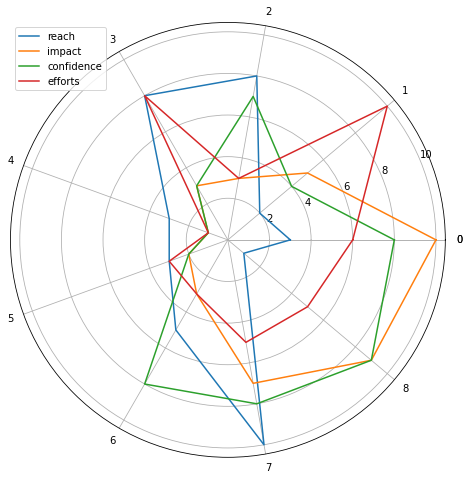

In [12]:
#visualize the reach-impact-confidence-efforts values for each of the hypotheses

#announce category names
categories = hypothesis['hypothesis']
categories = [*categories, categories[0]]

#declare variables with values for each of the indicators
reach = [*hypothesis['reach'], hypothesis['reach'][0]]
impact = [*hypothesis['impact'], hypothesis['impact'][0]]
confidence = [*hypothesis['confidence'], hypothesis['confidence'][0]]
efforts = [*hypothesis['efforts'], hypothesis['efforts'][0]]

#Radar Chart (aka spider plot)
plt.figure(figsize=(8, 8))
plt.subplot(polar=True)
label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
plt.plot(label_loc, reach, label='reach')
plt.plot(label_loc, impact, label='impact')
plt.plot(label_loc, confidence, label='confidence')
plt.plot(label_loc, efforts, label='efforts')
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=[0,1,2,3,4,5,6,7,8,0])
plt.legend(loc=2)
plt.show()

It is now visually easy to find the hypotheses with the highest/lowest reach-impact-confidence-efforts. For example, hypothesis #1 has the highest effort, average impact, below average confidence, and extremely low reach of all hypotheses. This hypothesis does not look very attractive. Hypothesis #7, on the contrary, has an average indicator of efforts, and the other three values have higher indicators: 7-10. Such hypothesis deserves our attention.

Next, we'll prioritize using ICE and RICE approaches and see if our visual-based guesses match up with the results we receive when applying ICE and RICE.


In [13]:
#apply ICE
hypothesis['ICE'] = (
    hypothesis['impact'] * hypothesis['confidence']
) / hypothesis['efforts']
hypothesis[['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)
pd.options.display.max_colwidth = 210

In [14]:
#apply RICE
hypothesis['RICE'] = (
    hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence']
) / hypothesis['efforts']

hypothesis[['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)


,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0



    
* Most promising ICE hypotheses: 8, 0, 7, 6, 2 (desc)
    
* Most promising RICE hypotheses: 7, 2, 0, 8, 6 (desc)
    
* We see that the prioritization of hypotheses has changed when using RICE instead of ICE. This happened because we introduced the Reach metric (number of users affected by the change). The 7th hypothesis has the highest Reach indicator (10), while this parameter is lower for other hypotheses.
    


# A/B-test analysis

* Build a graph of cumulative revenue by groups. Draw conclusions and assumptions.
* Build a graph of the cumulative average check for groups. Draw conclusions and assumptions.
* Build a graph of the relative change in the cumulative average check of group B to group A. Draw conclusions and assumptions.
* Build a graph of cumulative conversion by groups. Draw conclusions and assumptions.
* Build a graph of the relative change in the cumulative conversion of group B to group A. draw conclusions and assumptions.
* Build a point graph of the number of orders by users. Draw conclusions and assumptions.
* Calculate the 95th and 99th percentiles of the number of orders per user. Choose a criterium to identify anomalous users.
* Build a scatter chart of order values. Draw conclusions and assumptions.
* Calculate the 95th and 99th percentiles of order value. Choose a criterium to detect anomalous orders.
* Calculate the statistical significance of differences in conversion between groups according to "raw" data. Draw conclusions and assumptions.
* Calculate the statistical significance of the differences in the average check of the order between the groups according to the "raw" data. Draw conclusions and assumptions.
* Calculate the statistical significance of differences in conversion between groups according to the "cleaned" data. Draw conclusions and assumptions.
* Calculate the statistical significance of the differences in the average check of the order between the groups according to the "cleaned" data. Let's make conclusions and assumptions.

We will make a decision based on the results of the test. Solution options:

    1. Stop the test, record the victory of one of the groups.    
    2. Stop the test, record the absence of differences between groups.    
    3. Continue the test.

## Build a graph of cumulative revenue by groups. Draw conclusions and assumptions.

In [15]:
#create an array of unique pairs of date values and test groups
datesGroups = orders[['date','group']].drop_duplicates()

#collect aggregated daily cumulative order data
ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
.agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])

ordersAggregated

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854
...,...,...,...,...,...
533,2019-08-29,B,510,490,4746610
757,2019-08-30,A,460,437,3311413
690,2019-08-30,B,531,511,4955833
958,2019-08-31,A,468,445,3364656


In [16]:
#Get aggregated daily cumulative data about online store visitors

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(by=['date','group'])

visitorsAggregated

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845
...,...,...,...
533,2019-08-29,B,17708
757,2019-08-30,A,18037
690,2019-08-30,B,18198
958,2019-08-31,A,18736


In [17]:
#merge both tables into one and give the columns clear names

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845
...,...,...,...,...,...,...
57,2019-08-29,B,510,490,4746610,17708
58,2019-08-30,A,460,437,3311413,18037
59,2019-08-30,B,531,511,4955833,18198
60,2019-08-31,A,468,445,3364656,18736


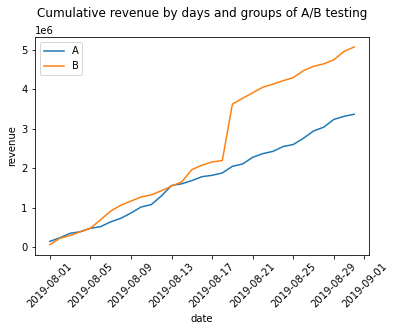

In [18]:
#build graphs of cumulative revenue by days and groups of A/B testing

cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('revenue')
#plt.rcParams["figure.figsize"] = (8,6)
plt.title('Cumulative revenue by days and groups of A/B testing', pad=20)
plt.legend();


    
* Revenue increases throughout the test.
    
* Within 20 days, revenue in both groups grew almost evenly.
    
* Further the revenue of group B increased sharply. This may signal spikes in the number of orders, or the appearance of very expensive orders in the sample. Outliers will be analyzed further.


## Build a graph of the cumulative average bill by groups. Draw conclusions and assumptions

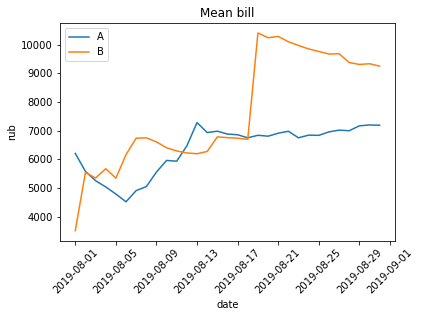

In [47]:
#Let's build charts of the average check by groups - 
#we will divide the cumulative revenue by the cumulative number of orders

plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('rub')
plt.title('Mean bill')
plt.legend();



    
The average bill of group B is significantly higher than the average bill of group A. We also see a big spike after the 20th day.
    
A big spike on the chart may mean that in the second half of the test, large orders fell into Group B.
    


## Build a graph of the relative change in the cumulative average bill of group B to group A. Draw conclusions and assumptions.

In [20]:
#collect data in one dataframe

mergedCumulativeRevenue = cumulativeRevenueA.merge(
    cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)
mergedCumulativeRevenue.head(10)

,date,revenueA,ordersA,revenueB,ordersB
0,2019-08-01,142779,23,59758,17
1,2019-08-02,234381,42,221801,40
2,2019-08-03,346854,66,288850,54
3,2019-08-04,388030,77,385740,68
4,2019-08-05,474413,99,475648,89
5,2019-08-06,515332,114,690490,112
6,2019-08-07,638580,130,909654,135
7,2019-08-08,727219,144,1059795,157
8,2019-08-09,861456,155,1162961,176
9,2019-08-10,1013731,170,1268123,198


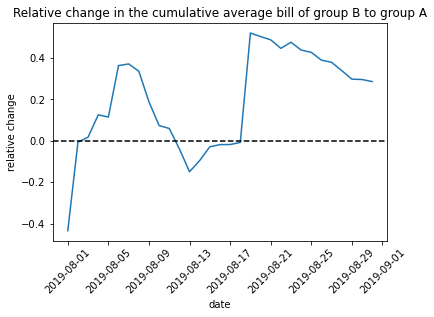

In [21]:
#build the ratio of average bills

plt.plot(
    mergedCumulativeRevenue['date'], (
        mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB']
    )/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('relative change')
plt.title('Relative change in the cumulative average bill of group B to group A')

#add axes X
plt.axhline(y=0, color='black', linestyle='--');



    
At several points, the graph of the difference between the segments jumps up and down. There are definitely large orders and outliers in our data that influenced the shape of the chart.



## Build a graph of the relative change in the cumulative conversion of group B to group A. Draw conclusions and assumptions.

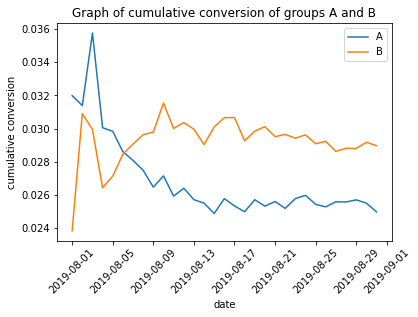

In [22]:
#calculate the cumulative conversion
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

#Separate data by group A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
 
#Separate data by group B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

#build graphs
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.xticks(rotation=45)
plt.xlabel('date')
plt.ylabel('cumulative conversion')
plt.title("Graph of cumulative conversion of groups A and B")
plt.legend();


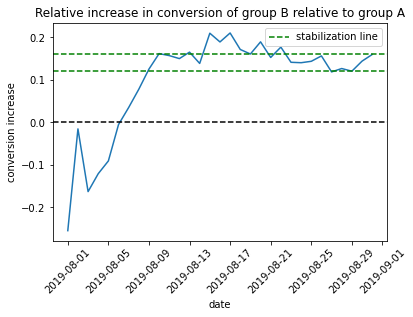

In [23]:
#build a graph of the relative difference of cumulative conversions

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(
    cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B']
)

plt.plot(
    mergedCumulativeConversions['date'], 
    mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1
)

plt.xlabel('date')
plt.ylabel('conversion increase')
plt.xticks(rotation=45)
plt.title("Relative increase in conversion of group B relative to group A")

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.12, color='green', linestyle='--', label='stabilization line')
plt.axhline(y=0.16, color='green', linestyle='--')
plt.legend();




For the first 5 days of the test, the conversion of group A was higher than group B. However, starting from the 6th day of the test, the conversion of group B, after a sharp increase, was significantly ahead of group A.
 


## Build a scatter plot of the number of orders by users. Draw conclusions and assumptions.

In [24]:
#Create a table with the number of orders for each user

ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': 'nunique'})
)

ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

      visitorId  orders
908  3967698036       3
55    249864742       3
478  2108163459       3
687  2988190573       3
890  3908431265       3
138   611059232       3
632  2742574263       3
157   678354126       2
323  1404560065       2
452  1985475298       2


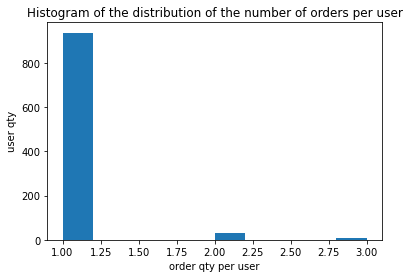

In [25]:
#build a histogram of the distribution of the number of orders per user

plt.hist(ordersByUsers['orders'])
plt.xlabel('order qty per user')
plt.ylabel('user qty')
plt.title('Histogram of the distribution of the number of orders per user');

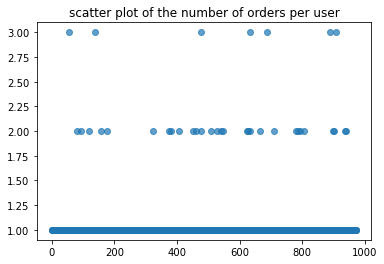

In [26]:
#build a scatter plot of the number of orders per user

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders'], alpha=0.7)
plt.title('scatter plot of the number of orders per user');

<div style="background-color:GhostWhite;padding:20px">
    
There are users who made 2-3 orders. However, the majority ordered only once.

</div>

## Calculate the 95th and 99th percentiles of orders qty per user. Choose a criterium to identify anomalous users.

In [27]:
#calculate the percentiles of the number of orders per user

print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]



    
No more than 5% of users placed more than 1 order. Only 1% of users ordered more than 2 times.
It is reasonable to choose 2 orders per user for the lower limit of the number of orders and weed out anomalous users according to it.
    


## Build a scatter plot of order values. Draw conclusions and assumptions.

(0.0, 300000.0)

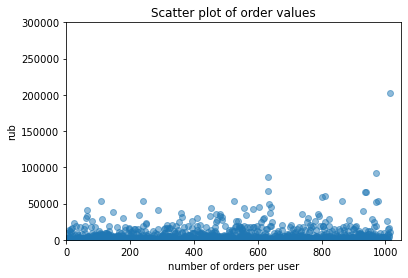

In [28]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'], alpha=0.5)
plt.title('Scatter plot of order values')
plt.xlabel('number of orders per user')
plt.ylabel('rub')
plt.xlim(0, 1050)
plt.ylim(0, 300000)


    
* The cost of individual orders does not exceed 50K.
    
* Most of the orders have the amount of no more than 25K.
    


## Calculate the 95th and 99th percentiles of order value. Choose a criterium to detect anomalous orders.

In [29]:
#calculate the percentiles of the cost of orders

print(np.percentile(orders['revenue'], [90, 95, 99]))

[17990. 26785. 53904.]



    
No more than 5% of orders are over 27000. Only 1% of orders is over 54000. It is reasonable to choose the lower limit of the order value of 27000 and weed out abnormal orders according to it.


## Calculate the statistical significance of differences in conversion between groups based on the "raw" data

**two-sided test:** The conversion of groups A and B based on the "raw" data is the same
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The conversion of groups A and B based on the "raw" data is the same}\\
   H_1 :\text{The conversion of groups A and B based on the "raw" data is different}
 \end{cases}
\end{equation*}$

Significance level: $\alpha = 0.05$

If the p-value is less than the chosen significance level $\alpha = 0.05$, then we reject the null hypothesis about the equality of the conversions. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.

In [30]:
alpha = 0.05

results = stats.mannwhitneyu(cumulativeDataA['conversion'], cumulativeDataB['conversion'])
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-value:  1.4496661752238628e-05
The null hypothesis is rejected


*We reject the null hypothesis => The conversion of groups A and B on the "raw" data is different*

**one-sided test:** Group B conversion is greater than Group A conversion based on the "raw" data
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The conversion of groups A and B based on the "raw" data is the same}\\
   H_1 :\text{Group B conversion is greater than Group A conversion based on the "raw" data}
 \end{cases}
\end{equation*}$

In [31]:
alpha = 0.05

results = stats.mannwhitneyu(cumulativeDataB['conversion'], cumulativeDataA['conversion'], alternative='greater')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-значение:  7.248330876119314e-06
The null hypothesis is rejected


*We reject the null hypothesis  => Group B conversion is greater than Group A conversion based on the "raw" data*

In [32]:
#calculate the relative increase in conversion in group B in relation to group A

print('the relative increase in conversion in group B in relation to group A based on the "raw" data =',
      '{0:.1%}'.format(cumulativeDataB['conversion'].mean()/
cumulativeDataA['conversion'].mean()-1))

the relative increase in conversion in group B in relation to group A based on the "raw" data = 9.0%




* The result of the non-parametric Mann-Whitney test on "raw" data showed that the conversion of group B is greater than the conversion of group A
    
* The relative increase in conversion in group B in relation to group A according to "raw" data is 9%



## Calculate the statistical significance of the differences in the average order receipt between the groups based on the "raw" data. Draw conclusions and assumptions.


**two-sided test:** The average bill for groups A and B is the same based on "raw" data
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The average bill for groups A and B is the same based on the "raw" data}\\
   H_1 :\text{The average bill for groups A and B differs based on the "raw" data}
 \end{cases}
\end{equation*}$

Significance level: $\alpha = 0.05$

If the p-value is less than the chosen significance level $\alpha = 0.05$, then we reject the null hypothesis about the equality of the means. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.


In [33]:
alpha = 0.05

results = stats.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'], alternative='two-sided'
)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-value:  0.8294908998149533
Failed to reject the null hypothesis


*Failed to reject the null hypothesis => There is no reason to believe that the average bills of groups based on the "raw" data is different*

In [34]:
print('{0:.1%}'.format(orders[orders['group']=='B']['revenue'].mean()/
orders[orders['group']=='A']['revenue'].mean()-1))

28.7%




P-value is significantly greater than 0.05. This means that there are no reasons to reject the null hypothesis and believe that there are differences in the average bills based on the “raw” data. However, the average bill of group B is almost 29% higher than the average check of group A.    




## Calculate the statistical significance of differences in conversion between groups according to the "clean" data. Draw conclusions and assumptions.

In [35]:
#Let's create variables in which we will save users who ordered at least 1 time, 
#and indicate the number of completed orders.

ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['visitorId', 'orders'] 


In [36]:
#declare variables
abnormalQuantity = 2
abnormalValue = 27000

#create slices of users with more than 2 orders
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > abnormalQuantity]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > abnormalQuantity]['visitorId'],
    ],
    axis=0,
)

#and users with order's values more than 27 000
usersWithExpensiveOrders = orders[orders['revenue'] > abnormalValue]['visitorId']

#Combine both and create a table abnormalUsers.
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print('Total anomalous users',abnormalUsers.shape[0])

568     113298937
1099    148427295
928     204675465
33      249864742
684     358944393
Name: visitorId, dtype: int64
Total anomalous users 58


In [37]:
#Save dataset without outliers under the name ordersFiltered

ordersFiltered = orders[np.logical_not(orders['visitorId'].isin(abnormalUsers))]

In [38]:
#create an array of unique pairs of date values and test groups

datesGroupsFiltered = ordersFiltered[['date','group']].drop_duplicates()

#collect aggregated daily cumulative order data

ordersAggregatedFiltered = datesGroupsFiltered.apply(
    lambda x: ordersFiltered[np.logical_and(ordersFiltered['date'] <= x['date'], 
                                            ordersFiltered['group'] == x['group'])]\
.agg(
        {'date' : 'max', 
         'group' : 'max', 
         'transactionId' : 'nunique', 
         'visitorId' : 'nunique', 
         'revenue' : 'sum'}
    ), axis=1
).sort_values(by=['date','group'])


In [39]:
#Get aggregated daily cumulative data about online-store visitors

visitorsAggregatedFiltered = datesGroupsFiltered.apply(
    lambda x: visitors[np.logical_and(
        visitors['date'] <= x['date'], visitors['group'] == x['group']
    )].agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1
).sort_values(by=['date','group'])

In [40]:
#merge both tables into one and give the columns clear names

cumulativeDataFiltered = ordersAggregatedFiltered.merge(
    visitorsAggregatedFiltered, left_on=['date', 'group'], right_on=['date', 'group']
)

cumulativeDataFiltered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [41]:
#calculate the cumulative conversion
cumulativeDataFiltered['conversion'] = cumulativeDataFiltered['orders']/cumulativeDataFiltered['visitors']

#Separate data by group A
cumulativeDataAFiltered = cumulativeDataFiltered[cumulativeData['group']=='A']
 
#Separate data by group B
cumulativeDataBFiltered = cumulativeDataFiltered[cumulativeData['group']=='B']

**two-sided test:** The conversion of groups A and B based on the "clean" data is the same
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The conversion of groups A and B based on the "clean" data is the same}\\
   H_1 :\text{The conversion of groups A and B based on the "clean" data is different}
 \end{cases}
\end{equation*}$

Significance level: $\alpha = 0.05$

If the p-value is less than the chosen significance level $\alpha = 0.05$, then we reject the null hypothesis about the equality of the conversions. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.

In [42]:
alpha = 0.05

results = stats.mannwhitneyu(cumulativeDataAFiltered['conversion'], cumulativeDataBFiltered['conversion'])
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-value:  2.830155926118375e-09
The null hypothesis is rejected


*The null hypothesis is rejected => The conversion of groups A and B based on the "clean" data is different*

**one-sided test:** Group B conversion is greater than Group A conversion based on the "clean" data
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The conversion of groups A and B based on the "clean" data is the same}\\
   H_1 :\text{Group B conversion is greater than Group A conversion based on the "clean" data}
 \end{cases}
\end{equation*}$


In [43]:
alpha = 0.05

results = stats.mannwhitneyu(cumulativeDataBFiltered['conversion'], 
                             cumulativeDataAFiltered['conversion'], 
                             alternative='greater')
print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-value:  1.4150779630591875e-09
The null hypothesis is rejected


*The null hypothesis is rejected => Group B conversion is greater than Group A conversion based on the "clean" data*

In [44]:
#calculate the relative increase in conversion in group B in relation to group A

print('Relative increase in conversion in group B in relation to group A according to "clean" data =',
      '{0:.1%}'.format(cumulativeDataBFiltered['conversion'].mean()/
cumulativeDataAFiltered['conversion'].mean()-1))

Relative increase in conversion in group B in relation to group A according to "clean" data = 14.7%


<div style="background-color:GhostWhite;padding:20px">
    
* The result of the non-parametric Mann-Whitney test on "clean" data showed that the conversion of group B is greater than the conversion of group A
    
* The relative increase in conversion in group B in relation to group A is 15.0%

</div>

## Calculate the statistical significance of the differences in the average order receipt between the groups based on the "clean" data. Draw conclusions and assumptions.

**Двусторонняя проверка:** Средний чек у групп А и В по «очищенным» данным одинаковый
<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{Средний чек у групп А и В по «очищенным» данным одинаковый}\\
   H_1 :\text{Средний чек у групп А и В по «очищенным» данным различается}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

**two-sided test:** The mean bill in groups A and B based on the "clean" data is the same
<p>Introduction of the null and the alternative hypotheses:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\text{The mean bill in groups A and B based on the "clean" data is the same}\\
   H_1 :\text{The mean bill in groups A and B based on the "clean" data is different}
 \end{cases}
\end{equation*}$

Significance level: $\alpha = 0.05$

If the p-value is less than the chosen significance level $\alpha = 0.05$, then we reject the null hypothesis about the equality of the means. Otherwise, we conclude that the data did not allow us to reject the null hypothesis.

In [45]:
alpha = 0.05

results = stats.mannwhitneyu(
    ordersFiltered[ordersFiltered['group']=='A']['revenue'], 
    ordersFiltered[ordersFiltered['group']=='B']['revenue'], 
    alternative='two-sided'
)

print('p-value: ', results.pvalue)

if (results.pvalue < alpha):
    print("The null hypothesis is rejected")
else:
    print("Failed to reject the null hypothesis")

p-value:  0.6458964038091206
Failed to reject the null hypothesis


*Failed to reject the null hypothesis => There are no reasons to believe that based on the "clean" data the average bill in groups is different*

In [46]:
print('{0:.1%}'.format(ordersFiltered[ordersFiltered['group']=='B']['revenue'].mean()/
ordersFiltered[ordersFiltered['group']=='A']['revenue'].mean()-1))

-4.8%


<div style="background-color:GhostWhite;padding:20px">
    
P-value is significantly greater than 0.05. This means that there are no reasons to reject the null hypothesis and believe that there are differences in the average bills. Although we note that the average bill in group B is 5% lower than the average bill in group A.
    
Apparently all the abnormally large orders were in group B.
</div>

# Conclusion


**The objectives of this study were:**
    
- prioritization of hypotheses,
    
- performance of A/B testing,
    
- analysis of results.

**To solve these problems, we took the following steps.**

1. We performed EDA:
    
* brought data types in accordance with the values,    
* made sure there were no obvious duplicates,    
* deleted all users who fell into both groups,   
* made sure the number of groups and checked the number of users in each group.
    
2. Performed prioritization of hypotheses using ICE and RICE methods and found following:
    
* Most promising ICE hypotheses: 8, 0, 7, 6, 2 (desc)    
* Most promising RICE hypotheses: 7, 2, 0, 8, 6 (desc)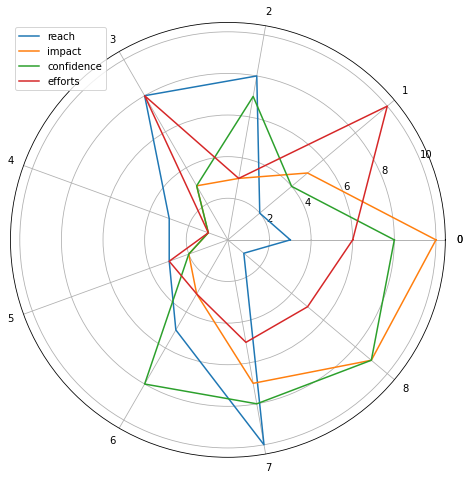
    
3. We built a graph of cumulative revenue by groups. On the basis of the graph, conclusions were drawn:
    
* Revenue was increasing throughout the test;   
* Within 20 days, revenue in both groups was growing almost evenly;   
* After Day 20, Group B's revenue increased dramatically.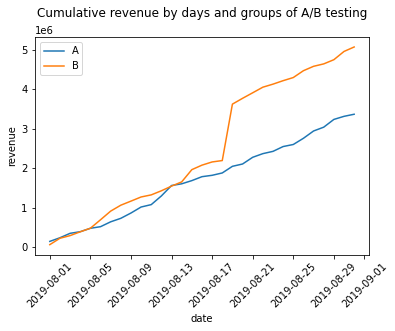
    
4. We built a graph of the cumulative average check for groups. On the basis of the graph, conclusions were drawn:
    
* The average bill in group B is significantly higher than the average bill in group A;    
* A sharp increase of the average bill in group B after the 20th day.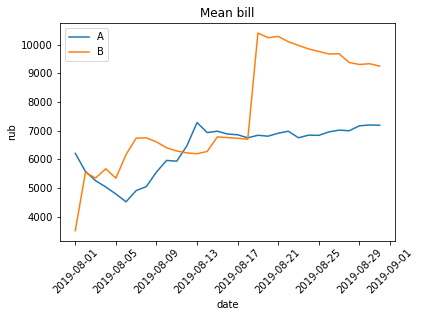
    
5. We built a graph of the relative change in the cumulative average bill in group B to group A. Based on the graph, we concluded that the dataset contains outliers.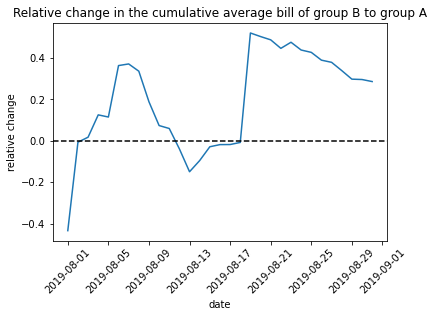
    
6. We built a graph of the relative change in the cumulative conversion of group B to group A. Based on the graph, conclusions were drawn:
    
* The first 5 days of the test, the conversion of group A was higher than group B;   
* Starting from day 6 of the test, group B conversion significantly outperforms group A.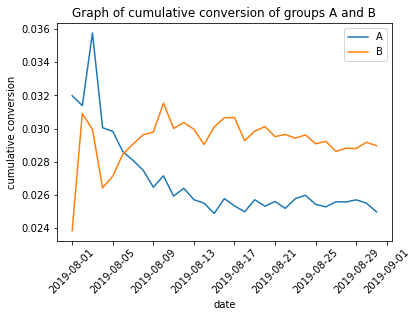 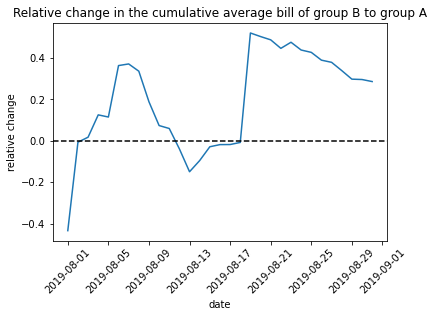
    
7. We built a histogram and a scatter plot of the number of orders by users:
    
* most buyers ordered only once; 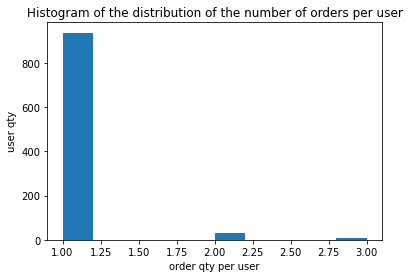 
* individual users with 2-3 orders.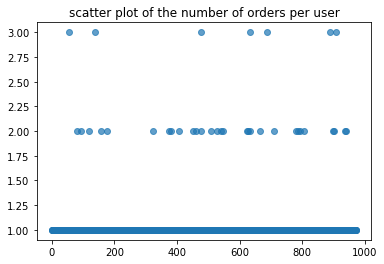
    
8. We calculated the 95th and 99th percentiles of the number of orders per user:
    
* no more than 5% of users placed more than 1 order;    
* only 1% of users ordered more than 2 times;    
* set 2 orders per user as the lower limit of the number of orders.
    
9. We built a dot plot of order values and found out, that
    
* the cost of individual orders did not exceed 50K;
* most of the orders had the amount of no more than 25K.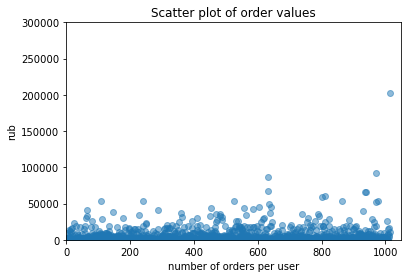
    
10. We calculated the 95th and 99th percentiles of order value:
    
* no more than 5% of orders exceeded 27,000;    
* only 1% of orders was over 54,000;    
* set as the lower limit of the cost of orders 27000.
    
11. Conducted a non-parametric Mann-Whitney test on "raw" data, the result of which showed that the conversion of group B is greater than the conversion of group A.
    
12. We found out that the relative increase in conversion in group B in relation to group A based on the "raw" data is 9%.
    
13. Conducted a non-parametric Mann-Whitney test on "raw" data, as a result of which it was not possible to reject the hypothesis that the average check for groups is the same.
    
14. We found out that the average check in group B based on the "raw" data is almost 29% higher.
    
15. Cleared data from outliers. We took for outliers the number of orders more than 2 and the order value more than 27000.
    
16. Conducted a non-parametric Mann-Whitney test on "clean" data, the result of which showed that the conversion of group B was greater than the conversion of group A.
    
17. We found out that the relative increase in conversion in group B in relation to group A based on the "clean" data was 15%.
    
18. Conducted a non-parametric Mann-Whitney test on “clean” data, as a result of which it was not possible to reject the hypothesis that the average check in groups is the same.
    
19. We found out that the average check in group B was lower than group A by 5%.


# Recommendations

    
**Recommendations to the marketing department on how to increase the revenue of the online store**

 1. If the coverage indicator (REACH) is not important for business:
    
* Focus on hypotheses: 8, 0, 7, 6, 2 (desc);
    
* Otherwise, focus on the most promising RICE hypotheses: 7, 2, 0, 8, 6 (desc).
 
2. You should stop the A / B test and announce the victory of group B, because:
    
* although we did not succeed in rejecting the hypothesis that the average check for groups was the same,
    
* we concluded that the conversion of group B was greater than the conversion of group A, as well as the relative increase in conversion in group B in relation to group A was 15% (based on the "clean" data) and 9% - based on the "raw",
    
* therefore, we are extensively increasing revenue by increasing the number of buyers in group B.    
    